In this notebook we will explore what exactly goes into pricing a diamond and how much each aspect affects the price.

    Question 1: Does a certain shape of diamond cost more than another?
    Question 2: How much do the 4 C's affect the price of a diamond?
    Question 3: Is it possible to know if you're getting a good price?

In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [255]:
# List of file names
files = ['data_cushion.csv', 'data_round.csv', 'data_heart.csv', 'data_emerald.csv', 'data_oval.csv',
         'data_marquise.csv', 'data_pear.csv', 'data_princess.csv']

dfs = []

#Read each file and appends its dataframe to the list
for file in files:
    df = pd.read_csv(file)
    dfs.append(df)

#Concatenate all dfs into a single dataframe
df = pd.concat(dfs, ignore_index=True)

In [256]:
df.head()

,Product_id,Shape,Weight,Clarity,Colour,Cut,Polish,Symmetry,Fluorescence,Messurements,Price,Product_url
0,2106452,CUSHION,0.55,SI2,N,VG,EX,EX,VG,N,$673.61,https://capitalwholesalediamonds.com/product/0...
1,2042329,CUSHION,0.52,SI2,Y-Z,EX,EX,EX,VG,F,$735.67,https://capitalwholesalediamonds.com/product/0...
2,2055268,CUSHION,0.50,SI1,L,VG,EX,EX,VG,N,$768.14,https://capitalwholesalediamonds.com/product/0...
3,2128779,CUSHION,0.50,VS2,M,EX,EX,EX,VG,F,$770.64,https://capitalwholesalediamonds.com/product/0...
4,2103991,CUSHION,0.51,SI1,M,EX,EX,EX,VG,N,$784.13,https://capitalwholesalediamonds.com/product/0...


In [257]:
# Check basic data information
df_info = df.info()

# Display basic descriptive statistics for numerical features
df_describe = df.describe()

df.shape, df_info, df_describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1590 entries, 0 to 1589
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    1590 non-null   object 
 1   Shape         1590 non-null   object 
 2   Weight        1590 non-null   float64
 3   Clarity       1578 non-null   object 
 4   Colour        1590 non-null   object 
 5   Cut           1589 non-null   object 
 6   Polish        1590 non-null   object 
 7   Symmetry      1590 non-null   object 
 8   Fluorescence  1590 non-null   object 
 9   Messurements  1590 non-null   object 
 10  Price         1590 non-null   object 
 11  Product_url   1590 non-null   object 
dtypes: float64(1), object(11)
memory usage: 149.2+ KB


((1590, 12),
 None,
             Weight
 count  1590.000000
 mean      0.563686
 std       0.102443
 min       0.500000
 25%       0.500000
 50%       0.510000
 75%       0.590000
 max       1.390000)

In [258]:
# Scatter plots
#sns.pairplot(df, vars=['Weight', 'Cut', 'Clarity', 'Colour', 'Price'])
#plt.show()

Clarity, Cut, Polish, Symmetry and Fluorescence has null values.

**Data Preparation**

In [259]:
#Check missing values
print(df.isnull().sum())

#Drop missing values
df.dropna(inplace=True)

Product_id       0
Shape            0
Weight           0
Clarity         12
Colour           0
Cut              1
Polish           0
Symmetry         0
Fluorescence     0
Messurements     0
Price            0
Product_url      0
dtype: int64


In [260]:
#Check for duplicates
duplicate_rows = df[df.duplicated()]
duplicate_rows.shape[0]

# Keep the first occurrence of each duplicated row
df.drop_duplicates(keep='last', inplace=True)
len(df)

1577

In [261]:
#Remove commas and dollar signs from Price column and convert to float
df['Price'] = df['Price'].replace('[\$,]', '',regex=True).astype(float)

#Convert Carat to numeric 
df['Carat'] = pd.to_numeric(df['Weight'], errors='coerce')

# Ensure 'Cut' column is categorical
df['Cut'] = df['Cut'].astype('category')


**Shape effect**

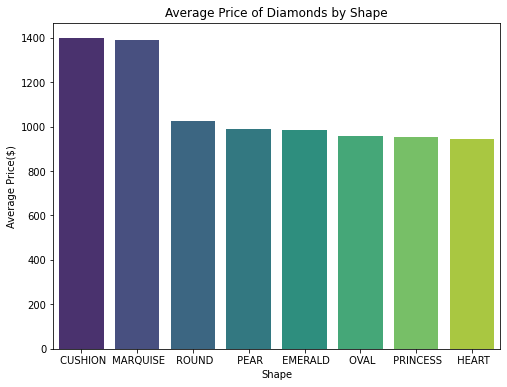

In [262]:
#Calculate avg price by shape
avg_prices_by_shape = df.groupby('Shape')['Price'].mean().reset_index()

avg_prices_by_shape_sorted = avg_prices_by_shape.sort_values(by='Price', ascending=False)

#Visualisasation with barplot
plt.figure(figsize=(8, 6))
sns.barplot(x='Shape', y='Price', data=avg_prices_by_shape_sorted, palette='viridis')
plt.title('Average Price of Diamonds by Shape')
plt.xlabel('Shape')
plt.ylabel('Average Price($)')
plt.show()

In [263]:
# Scatter plots
#sns.pairplot(df, vars=['Weight', 'Cut', 'Clarity', 'Colour', 'Price'])
#plt.show()


**Affect of 4Cs on the price of diamond**


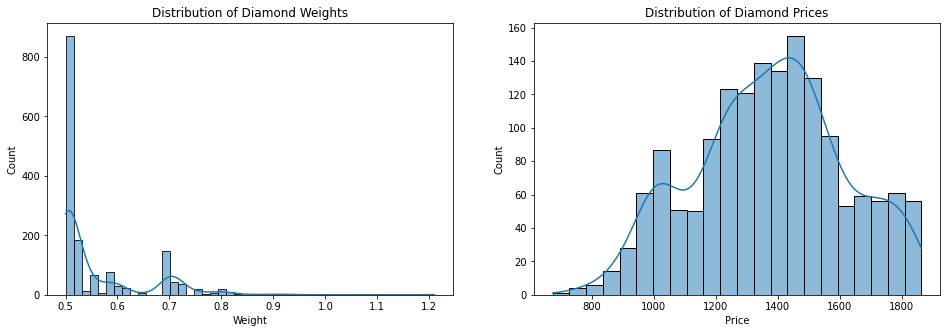

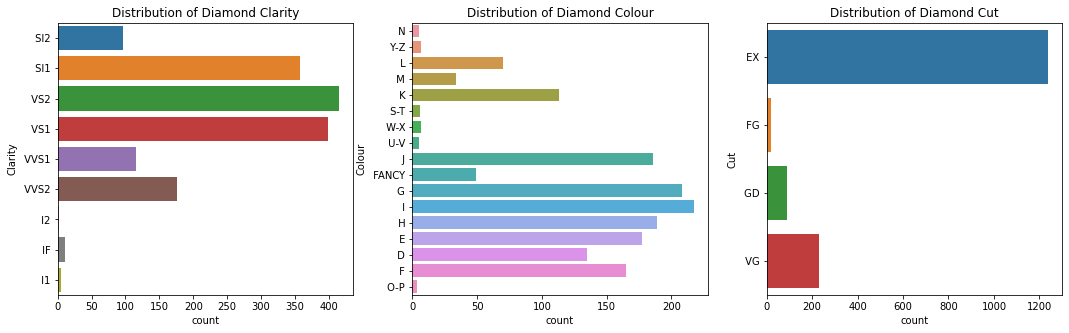

In [264]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Weight'], kde=True)
plt.title('Distribution of Diamond Weights')

plt.subplot(1, 2, 2)
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Diamond Prices')

# Count plots for categorical features (Clarity, Color, and Cut)
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.countplot(y='Clarity', data=df)
plt.title('Distribution of Diamond Clarity')

plt.subplot(1, 3, 2)
sns.countplot(y='Colour', data=df)
plt.title('Distribution of Diamond Colour')

plt.subplot(1, 3, 3)
sns.countplot(y='Cut', data=df)
plt.title('Distribution of Diamond Cut')
plt.show()

Text(0.5, 1.0, 'Diamond Price by Colour')

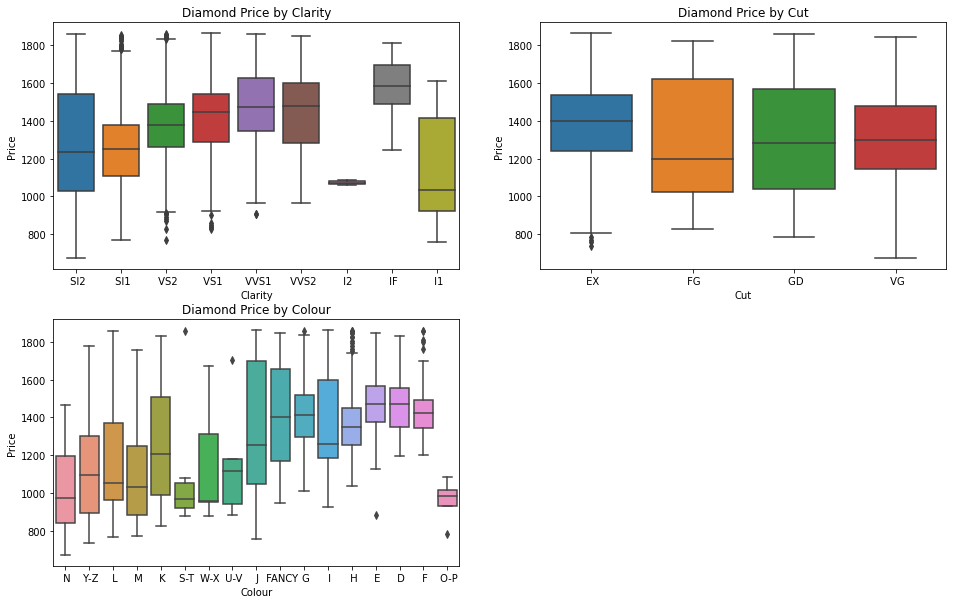

In [267]:

# Boxplots for categorical data
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='Clarity', y='Price', data=df)
plt.title('Diamond Price by Clarity')

plt.subplot(2, 2, 2)
sns.boxplot(x='Cut', y='Price', data=df)
plt.title('Diamond Price by Cut')

plt.subplot(2, 2, 3)
sns.boxplot(x='Colour', y='Price', data=df)
plt.title('Diamond Price by Colour')


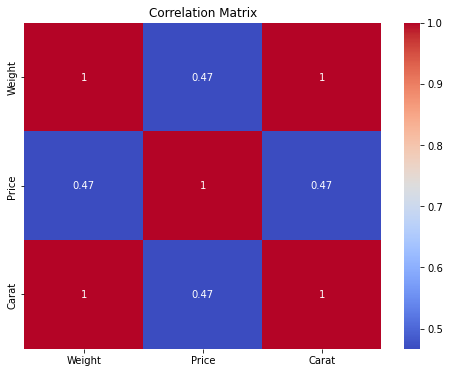

In [ ]:
# Correlation matrix heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
